# Tutorial 2: Generating Attributions

This tutorial demonstrates how to generate attributions using a variety of pretrained foundation models and explainability methods. 

**Foundation models**: 

<u>scFoundation</u> (scfoundation): Works for [scFoundation](https://github.com/biomap-research/scFoundation/tree/main) model architecture. Pretrained model can be downloaded from [here](https://huggingface.co/genbio-ai/scFoundation/tree/main)

<u>SCimilarity</u> (scimilarity): Works with [SCimilarity](https://github.com/Genentech/scimilarity) model architecture. Pretrained model can be downloaded from [here](https://zenodo.org/records/15729925)

<u>scVI-CZI</u> (scvi): Currently designed for scVI [models](https://cellxgene.cziscience.com/census-models) trained on CZI Census data. But can be applied to any scVI model

<u>scTab-SSL</u> (ssl): Code designed for SSL model downloaded from [here](https://huggingface.co/TillR/sc_pretrained/tree/main), including both [pre-trained models](https://huggingface.co/TillR/sc_pretrained/tree/main/Pretrained%20Models) and [fine-tuned models](https://huggingface.co/TillR/sc_pretrained/tree/main/Finetuned%20Models)


**Explainability methods**: Integrated Gradients (ig), DeepLIFT (dl), Input x Gradient (ixg). 

Before running this tutorial, you need to:

1. Download the model_files folder from [here](https://zenodo.org/records/17903196) and download an specific pretrained weights of interest from the links above
2. Download the small h5ad dataset (tutorial_dataset.h5ad) from [here](https://zenodo.org/records/17905668)

In [1]:
from os.path import join
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [2]:
data_file = "home/tutorial_dataset.h5ad" # change to path of your data file
adata = sc.read_h5ad(data_file)

In [3]:
base_model_fold = "home/model_files/" # change to path where model_files was downloaded

In [4]:
ms1_genes = ['S100A8', 'S100A12', 'RETN', 'CLU', 'MCEMP1', 'IL1R2', 'CYP1B1', 'SELL', 
             'ALOX5AP', 'SLC39A8', 'PLAC8', 'ACSL1', 'CD163', 'VCAN', 'HP', 'CTSD', 
             'LGALS1', 'THBS1', 'CES1', 'S100P', 'ANXA6', 'VNN2', 'NAMPT', 'HAMP', 
             'DYSF', 'SDF2L1', 'NFE2', 'SLC2A3', 'BASP1', 'ADGRG3', 'SOD2', 'CTSA', 
             'PADI4', 'CALR', 'SOCS3', 'NKG7', 'FLOT1', 'IL1RN', 'ZDHHC19', 'LILRA5', 
             'ASGR2', 'FAM65B', 'MNDA', 'STEAP4', 'NCF4', 'LBR', 'RP11-295G20.2', 
             'UBR4', 'PADI2', 'NCF1', 'LINC00482', 'RUNX1', 'RRP12', 'HSPA1A', 
             'FLOT2', 'ANPEP', 'CXCR1', 'ECE1', 'ADAM19', 'RP11-196G18.3', 'IL4R', 
             'DNAJB11', 'FES', 'MBOAT7', 'SNHG25', 'RP1-55C23.7', 'CPEB4', 'PRR34-AS1', 
             'HSPA1B', 'LINC01001', 'C1QC', 'SBNO2', 'GTSE1', 'FOLR3', 'STAB1', 'PLK1', 
             'HYI-AS1', 'LINC01281', 'TNNT1', 'AC097495.2', 'CTB-35F21.5', 'C19orf35', 
             'AC109826.1', 'RP11-800A3.7', 'LILRA6', 'PDLIM7', 'NPLOC4', 'C15orf48', 
             'APOBR', 'CSF2RB', 'CTD-2105E13.14', 'C1QB', 'RP11-123K3.9', 'IQGAP3', 
             'GAPLINC', 'CTC-490G23.2', 'JAK3', 'CTC-246B18.10', 'MYO5B']

# SCimilarity
Pretrained model included with pre-trained models folders. Can also be downloaded from [here](https://zenodo.org/records/15729925)

In [6]:
from SIGnature.models.scimilarity import SCimilarityWrapper

model_path = join(base_model_fold, "scimilarity")
scim = SCimilarityWrapper(model_path=model_path, use_gpu=True)

In [7]:
tadata = scim.preprocess_adata(adata.copy())

In [8]:
# replace "ig" (integrated gradients) with "dl" (deeplift) or "ixg" (input x gradients) for other methods. 
atts = scim.calculate_attributions(
    tadata.X, batch_size=100, method="ig"
)

  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:01<00:00,  4.71it/s]


Text(0.5, 0, '')

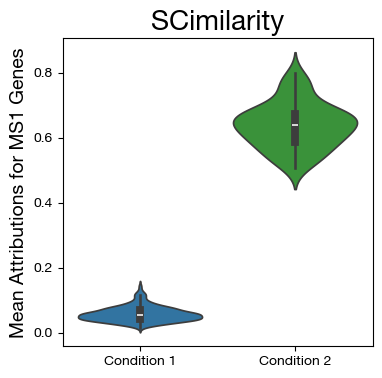

In [17]:
mdf = tadata.obs.copy()
mgenes = tadata.var.index.tolist()
gi = [mgenes.index(x) for x in ms1_genes if x in mgenes]
mdf["MS1"] = atts[:, gi].mean(axis=1)

fig,ax = plt.subplots(figsize=(4,4))
sns.violinplot(data=mdf, x="disease", y="MS1", density_norm='width',
palette=["tab:blue", "tab:green"])
ax.set_title('SCimilarity', fontsize=20)
ax.set_ylabel('Mean Attributions for MS1 Genes', fontsize=14)
ax.set_xlabel('')

# scFoundation
To use scFoundation, download the pre-trained models folder. Then download the models.ckpt file from [here](https://huggingface.co/genbio-ai/scFoundation/tree/main) and put into scfoundation folder.

In [18]:
from SIGnature.models.scfoundation import SCFoundationWrapper

model_path = join(base_model_fold, "scfoundation")
scf = SCFoundationWrapper(model_path=model_path, use_gpu=True)

{'mask_gene_name': False, 'gene_num': 19266, 'seq_len': 19266, 'encoder': {'hidden_dim': 768, 'depth': 12, 'heads': 12, 'dim_head': 64, 'seq_len': 19266, 'module_type': 'transformer', 'norm_first': False}, 'decoder': {'hidden_dim': 512, 'depth': 6, 'heads': 8, 'dim_head': 64, 'module_type': 'performer', 'seq_len': 19266, 'norm_first': False}, 'n_class': 104, 'pad_token_id': 103, 'mask_token_id': 102, 'bin_num': 100, 'bin_alpha': 1.0, 'rawcount': True, 'model': 'mae_autobin', 'test_valid_train_idx_dict': '/nfs_beijing/minsheng/data/os10000w-new/global_shuffle/meta.csv.train_set_idx_dict.pt', 'valid_data_path': '/nfs_beijing/minsheng/data/valid_count_10w.npz', 'num_tokens': 13, 'train_data_path': None, 'isPanA': False, 'isPlanA1': False, 'max_files_to_load': 5, 'bin_type': 'auto_bin', 'value_mask_prob': 0.3, 'zero_mask_prob': 0.03, 'replace_prob': 0.8, 'random_token_prob': 0.1, 'mask_ignore_token_ids': [0], 'decoder_add_zero': True, 'mae_encoder_max_seq_len': 15000, 'isPlanA': False, 'ma

In [19]:
tadata = scf.preprocess_adata(adata.copy())

In [20]:
# replace "ig" (integrated gradients) with "dl" (deeplift) or "ixg" (input x gradients) for other methods. 
# batch size set to 1 for scfoundation due to memory constraints
atts = scf.calculate_attributions(tadata.X, batch_size=1, method="ig")

100%|██████████| 550/550 [05:32<00:00,  1.65it/s]


Text(0.5, 0, '')

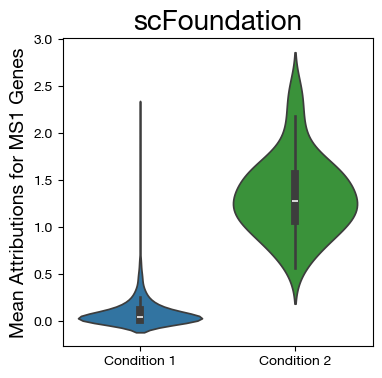

In [21]:
mdf = tadata.obs.copy()
mgenes = tadata.var.index.tolist()
gi = [mgenes.index(x) for x in ms1_genes if x in mgenes]
mdf["MS1"] = atts[:, gi].mean(axis=1)

fig,ax = plt.subplots(figsize=(4,4))
sns.violinplot(data=mdf, x="disease", y="MS1", density_norm='width',
palette=["tab:blue", "tab:green"])
ax.set_title('scFoundation', fontsize=20)
ax.set_ylabel('Mean Attributions for MS1 Genes', fontsize=14)
ax.set_xlabel('')

# SSL-scTab
To use SSL models, download the pre-trained models folder. Individual models can then be downloaded from [here](https://huggingface.co/TillR/sc_pretrained/tree/main)

### scTab RandomMask Constrastive Loss
To use this model, download "RandomMask.ckpt" from [here](https://huggingface.co/TillR/sc_pretrained/tree/main/Pretrained%20Models) and put in SSL folder.

In [22]:
from SIGnature.models.ssl import SSLWrapper

model_path = join(base_model_fold, "ssl")
ssl = SSLWrapper(model_path=model_path, model_filename="RandomMask.ckpt", use_gpu=True)

In [23]:
tadata = ssl.preprocess_adata(adata.copy())

In [24]:
# replace "ig" (integrated gradients) with "dl" (deeplift) or "ixg" (input x gradients) for other methods. 
atts = ssl.calculate_attributions(
    tadata.X, batch_size=100, method="ig"
)

100%|██████████| 6/6 [00:00<00:00,  7.76it/s]


Text(0.5, 0, '')

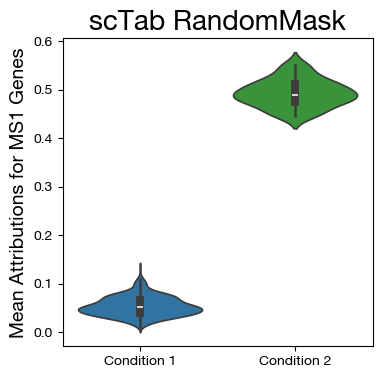

In [25]:
mdf = tadata.obs.copy()
mgenes = tadata.var.index.tolist()
gi = [mgenes.index(x) for x in ms1_genes if x in mgenes]
mdf["MS1"] = atts[:, gi].mean(axis=1)

fig,ax = plt.subplots(figsize=(4,4))
sns.violinplot(data=mdf, x="disease", y="MS1", density_norm='width',
palette=["tab:blue", "tab:green"])
ax.set_title('scTab RandomMask', fontsize=20)
ax.set_ylabel('Mean Attributions for MS1 Genes', fontsize=14)
ax.set_xlabel('')

### Gene Reconstruction FineTuned Model


To use this model, download "Tabula_Sapiens_Supervised.ckpt" from [here](https://huggingface.co/TillR/sc_pretrained/tree/main/Finetuned%20Models/Gene%20Expression%20Reconstruction), rename it "Tabula_Sapiens_SSL_GR.ckpt", and put it in SSL folder.

In [26]:
from SIGnature.models.ssl import SSLWrapper

model_path = join(base_model_fold, "ssl")
ssl = SSLWrapper(model_path=model_path, model_filename="Tabula_Sapiens_SSL_GR.ckpt", use_gpu=True)

In [27]:
tadata = ssl.preprocess_adata(adata.copy())

In [28]:
# replace "ig" (integrated gradients) with "dl" (deeplift) or "ixg" (input x gradients) for other methods. 
atts = ssl.calculate_attributions(
    tadata.X, batch_size=100, method="ig"
)

100%|██████████| 6/6 [00:00<00:00,  8.02it/s]


Text(0.5, 0, '')

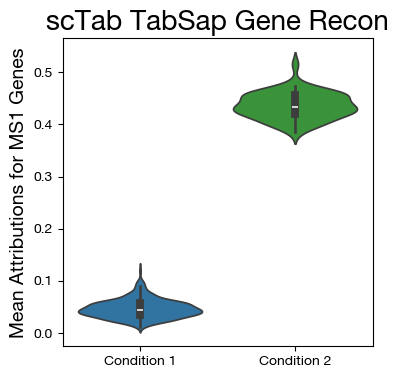

In [29]:
mdf = tadata.obs.copy()
mgenes = tadata.var.index.tolist()
gi = [mgenes.index(x) for x in ms1_genes if x in mgenes]
mdf["MS1"] = atts[:, gi].mean(axis=1)

fig,ax = plt.subplots(figsize=(4,4))
sns.violinplot(data=mdf, x="disease", y="MS1", density_norm='width',
palette=["tab:blue", "tab:green"])
ax.set_title('scTab TabSap Gene Recon', fontsize=20)
ax.set_ylabel('Mean Attributions for MS1 Genes', fontsize=14)
ax.set_xlabel('')

### Cell Type FineTuned Model

To use this model, download "Tabula_Sapiens_Supervised.ckpt" from [here](https://huggingface.co/TillR/sc_pretrained/tree/main/Finetuned%20Models/Cell%20Type%20Prediction), rename it "Tabula_Sapiens_SSL_CT.ckpt", and put it in SSL folder.

In [24]:
from SIGnature.models.ssl import SSLWrapper

model_path = join(base_model_fold, "ssl")
ssl = SSLWrapper(model_path=model_path, model_filename="Tabula_Sapiens_SSL_CT.ckpt",
use_gpu=True)

In [25]:
tadata = ssl.preprocess_adata(adata.copy())

In [26]:
# replace "ig" (integrated gradients) with "dl" (deeplift) or "ixg" (input x gradients) for other methods. 
atts = ssl.calculate_attributions(
    tadata.X, batch_size=100, method="ig"
)

100%|██████████| 6/6 [00:00<00:00, 10.59it/s]


Text(0.5, 0, '')

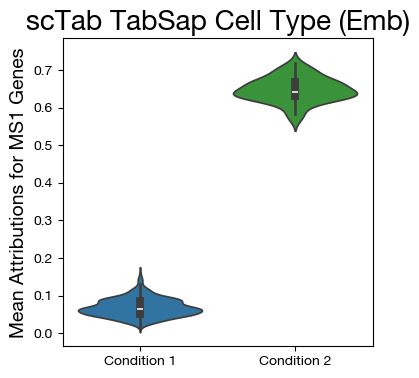

In [27]:
mdf = tadata.obs.copy()
mgenes = tadata.var.index.tolist()
gi = [mgenes.index(x) for x in ms1_genes if x in mgenes]
mdf["MS1"] = atts[:, gi].mean(axis=1)

fig,ax = plt.subplots(figsize=(4,4))
sns.violinplot(data=mdf, x="disease", y="MS1", density_norm='width',
palette=["tab:blue", "tab:green"])
ax.set_title('scTab TabSap Cell Type (Emb)', fontsize=20)
ax.set_ylabel('Mean Attributions for MS1 Genes', fontsize=14)
ax.set_xlabel('')

### Cell Type FineTuned Model (last layer)

To use this model, download "Tabula_Sapiens_Supervised.ckpt" from [here](https://huggingface.co/TillR/sc_pretrained/tree/main/Finetuned%20Models/Cell%20Type%20Prediction), rename it "Tabula_Sapiens_SSL_CT.ckpt", and put it in SSL folder.

By default, the models from the ssl_in_scg paper have 5 layers for the embedder/backbone. 

If you want to calculate attributions on a different layer, you can adjust the n_layers parameter in SSL

In [29]:
from SIGnature.models.ssl import SSLWrapper

model_path = join(base_model_fold, "ssl")
# model_path = join('/home/goldm3/scratch/signature_revision/ssl_in_scg/model_checkpoints/')
## consider the 6th (final classification layer)
ssl = SSLWrapper(model_path=model_path, model_filename="Tabula_Sapiens_SSL_CT.ckpt", use_gpu=True, n_layers=6)

In [30]:
tadata = ssl.preprocess_adata(adata.copy())

In [31]:
# replace "ig" (integrated gradients) with "dl" (deeplift) or "ixg" (input x gradients) for other methods. 
# default layer is set to 12 (final layer of embedding for this structure. Can change to None to get attributions from entire final classification layer)
atts = ssl.calculate_attributions(
    tadata.X, batch_size=100, method="ig", 
)

100%|██████████| 6/6 [00:00<00:00, 10.29it/s]


Text(0.5, 0, '')

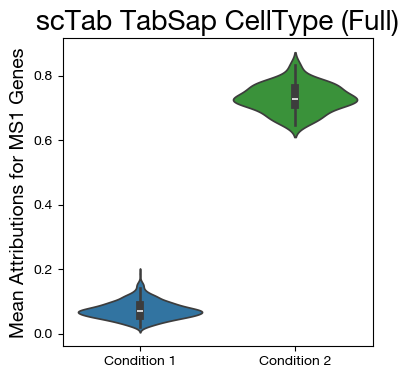

In [32]:
mdf = tadata.obs.copy()
mgenes = tadata.var.index.tolist()
gi = [mgenes.index(x) for x in ms1_genes if x in mgenes]
mdf["MS1"] = atts[:, gi].mean(axis=1)

fig,ax = plt.subplots(figsize=(4,4))
sns.violinplot(data=mdf, x="disease", y="MS1", density_norm='width',
palette=["tab:blue", "tab:green"])
ax.set_title('scTab TabSap CellType (Full)', fontsize=20)
ax.set_ylabel('Mean Attributions for MS1 Genes', fontsize=14)
ax.set_xlabel('')

# scVI
To use this model, **you must install scVI package to calculate attributions with scVI**  ("pip install scvi-tools[cuda]" for GPU or "pip install scvi-tools" for no GPU)

Then, download the scvi model of choice from [here](https://cellxgene.cziscience.com/census-models) and put into scvi folder

In [38]:
from SIGnature.models.scvi import SCVIWrapper

model_base = join(base_model_fold, "scvi")
model_path = join(model_base, "2023-12-15-scvi-homo-sapiens/scvi.model")
scvi = SCVIWrapper(model_path=model_path, use_gpu=True)

In [39]:
tadata = scvi.preprocess_adata(
    adata.copy(), ensembl_gene_file=join(model_base, "ensembl_gene_symbols.txt")
)

INFO     File /gstore/data/omni/scdb/signature/model_files/scvi/2023-12-15-scvi-homo-sapiens/scvi.model/model.pt   
         already downloaded                                                                                        


INFO     File /gstore/data/omni/scdb/signature/model_files/scvi/2023-12-15-scvi-homo-sapiens/scvi.model/model.pt   
         already downloaded                                                                                        
INFO     Found 48.8375% reference vars in query data.                                                              


In [40]:
# replace "ig" (integrated gradients) with "dl" (deeplift) or "ixg" (input x gradients) for other methods. 
atts = scvi.calculate_attributions(
    tadata, batch_size=100, method="ig"
)

INFO     File /gstore/data/omni/scdb/signature/model_files/scvi/2023-12-15-scvi-homo-sapiens/scvi.model/model.pt   
         already downloaded                                                                                        


100%|██████████| 6/6 [00:00<00:00,  8.92it/s]


Text(0.5, 0, '')

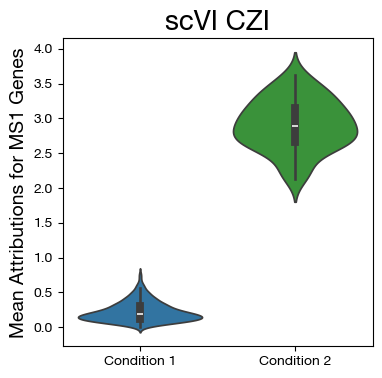

In [41]:
mdf = tadata.obs.copy()
mgenes = tadata.var.symbol.tolist()
gi = [mgenes.index(x) for x in ms1_genes if x in mgenes]
mdf["MS1"] = atts[:, gi].mean(axis=1)

fig,ax = plt.subplots(figsize=(4,4))
sns.violinplot(data=mdf, x="disease", y="MS1", density_norm='width',
palette=["tab:blue", "tab:green"])
ax.set_title('scVI CZI', fontsize=20)
ax.set_ylabel('Mean Attributions for MS1 Genes', fontsize=14)
ax.set_xlabel('')